In [2]:
import tensorflow

2023-03-09 15:32:11.213673: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# list gpu
tensorflow.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [19]:
from tensorflow import keras

# import layers
from tensorflow.keras.layers import *
from tensorflow.keras.models import *

In [20]:
model = Sequential([
    Conv2D(64, 3,padding='same', input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3,padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3,padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3,padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [21]:
# import tensorboard from tensorflow
from tensorflow.keras.callbacks import TensorBoard

In [22]:
# draw architecture of model
from tensorflow.keras.utils import plot_model

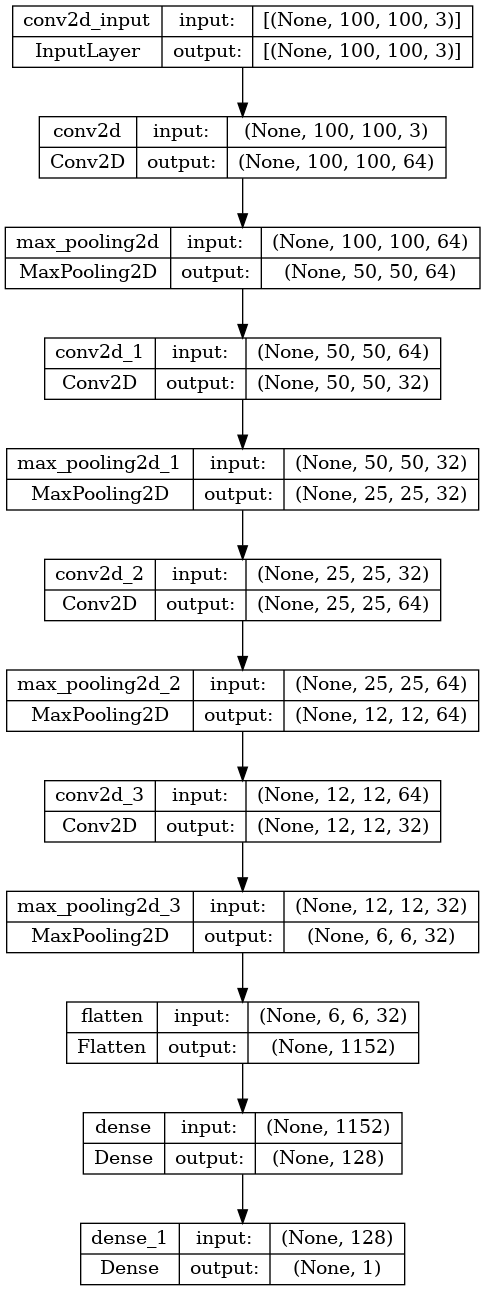

In [23]:
plot_model(model, to_file='model.png', show_shapes=True)

In [24]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [25]:
from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."


TensorFlow version:  2.11.0


In [26]:
import tensorboard
tensorboard.__version__


'2.11.0'

In [27]:
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
from test_train_data import x_train, y_train, x_test, y_test

In [29]:
# complie model, make sure there is good accuracy and precision
model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'Precision'])

In [30]:
model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/30
324/324 [==============================] - 6s 11ms/step - loss: 0.3549 - accuracy: 0.8402 - precision: 0.7652 - val_loss: 0.2310 - val_accuracy: 0.9085 - val_precision: 0.8213
Epoch 2/30
324/324 [==============================] - 3s 8ms/step - loss: 0.2167 - accuracy: 0.9149 - precision: 0.8412 - val_loss: 0.1968 - val_accuracy: 0.9256 - val_precision: 0.8628
Epoch 3/30
324/324 [==============================] - 3s 8ms/step - loss: 0.1660 - accuracy: 0.9381 - precision: 0.8847 - val_loss: 0.1535 - val_accuracy: 0.9470 - val_precision: 0.9356
Epoch 4/30
324/324 [==============================] - 3s 8ms/step - loss: 0.1318 - accuracy: 0.9513 - precision: 0.9086 - val_loss: 0.1604 - val_accuracy: 0.9368 - val_precision: 0.8981
Epoch 5/30
324/324 [==============================] - 3s 8ms/step - loss: 0.1119 - accuracy: 0.9594 - precision: 0.9211 - val_loss: 0.1205 - val_accuracy: 0.9560 - val_precision: 0.9026
Epoch 6/30
324/324 [==============================] - 3s 8ms/step - l

In [31]:
# evaluate model
model.evaluate(x_test, y_test)

108/108 [==============================] - 0s 4ms/step - loss: 0.1340 - accuracy: 0.9681 - precision: 0.9407


[0.13401374220848083, 0.9681344032287598, 0.9407244920730591]

In [32]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 6647), started 0:09:45 ago. (Use '!kill 6647' to kill it.)